In [365]:
# IMPORTING LIBRARIES
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [366]:
# LOADING data
df1 = pd.read_csv("Life-Expectancy-Data-Updated.csv")

In [367]:
# CHECKING YEARS
df1['Year'].unique()

array([2015, 2007, 2006, 2012, 2000, 2001, 2008, 2011, 2002, 2013, 2005,
       2003, 2004, 2009, 2010, 2014], dtype=int64)

In [368]:
# CHECKING COLUMNS
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [369]:
# SNAPSHOT OF life-expectancy per region
df1.groupby('Region')['Life_expectancy'].mean().nlargest(9)

Region
North America                    77.841667
European Union                   77.715046
Rest of Europe                   74.525417
Middle East                      73.975446
South America                    72.780729
Central America and Caribbean    72.437500
Oceania                          69.517614
Asia                             69.454861
Africa                           57.847304
Name: Life_expectancy, dtype: float64

In [370]:
# GLOBAL LIFE EXPECTANCY
avg_life = df1['Life_expectancy'].mean()

In [371]:
# 
top_reg = df1.groupby('Region')['Life_expectancy'].mean().sort_values(ascending=False).reset_index()


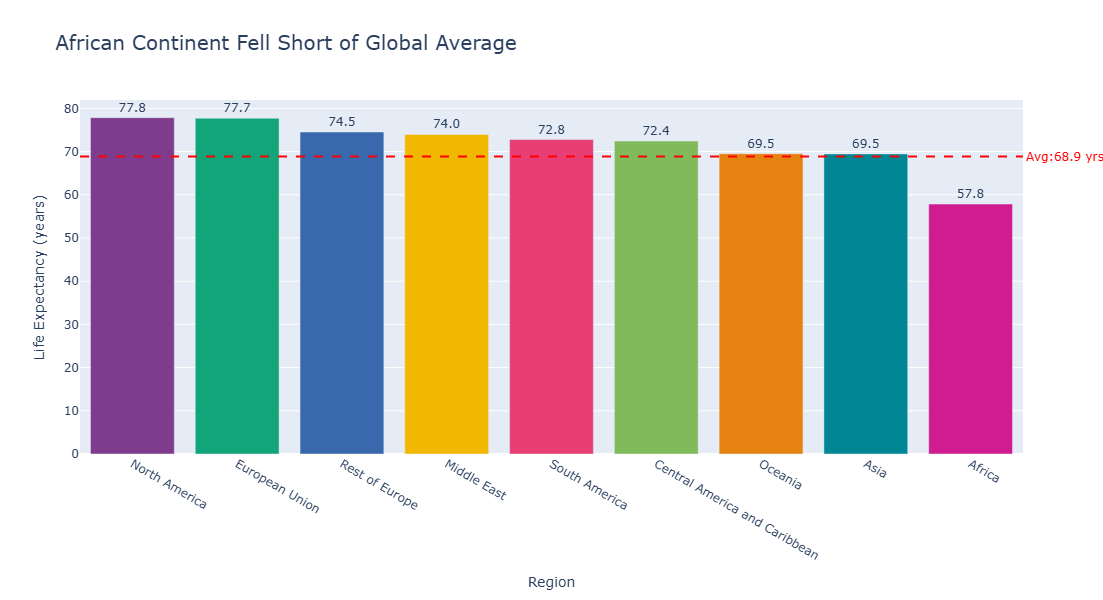

In [372]:
fig = px.bar(
    top_reg,
    x="Region",
    y="Life_expectancy",
    color="Region",                
    color_discrete_sequence=px.colors.qualitative.Bold, 
    text="Life_expectancy",        
    title="African Continent Fell Short of Global Average",
    labels={"Life_expectancy": "Life Expectancy (years)"}
)


fig.add_hline(
    y=avg_life,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Avg:{round(avg_life,1)} yrs",
    annotation_position="right",   
    annotation_font_color="red",
    annotation=dict(xref="paper") 
)


fig.update_traces(texttemplate="%{text:.1f}", textposition="outside")


fig.update_layout(
    width=1000,
    height=600,
    showlegend=False,   
    yaxis_title="Life Expectancy (years)",
    xaxis_title="Region",
    title_font_size=20
)

fig.show()

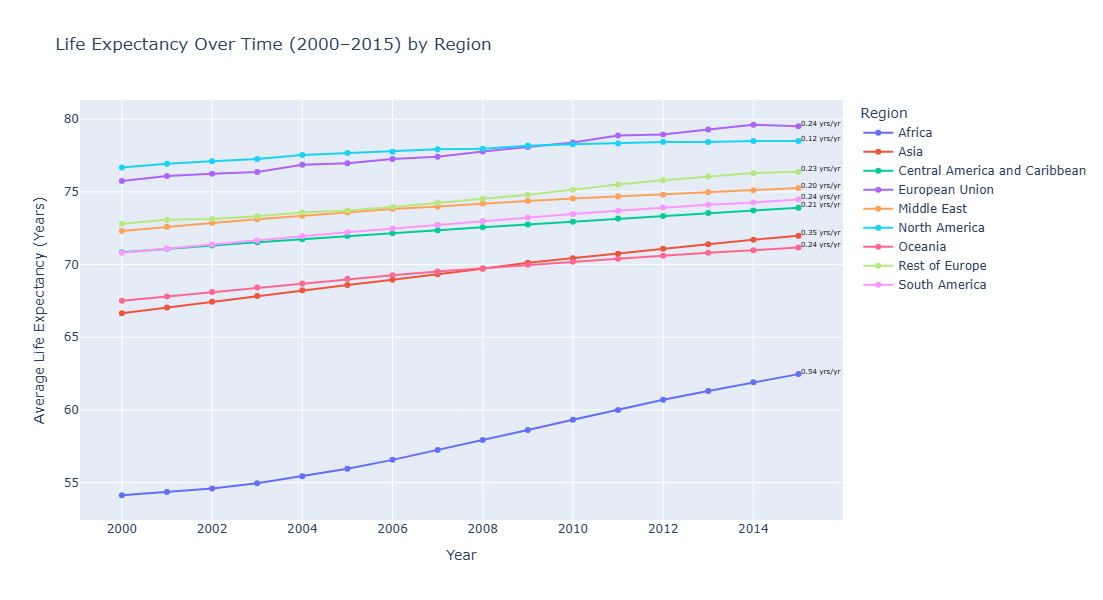

In [373]:
# GROUP BY YEAR AND REGION
df_region = (
    df1.groupby(["Region", "Year"])["Life_expectancy"]
       .mean()
       .reset_index()
)
# LINE PLOT
fig = px.line(
    df_region,
    x="Year",
    y="Life_expectancy",
    color="Region",
    markers=True,
    title="Life Expectancy Over Time (2000–2015) by Region",
    labels={"Life_expectancy": "Average Life Expectancy (Years)"}
)

# CALC AVERAGE CHANGE OVER 15 YEAR PERIOD
regions = df_region['Region'].unique()
for region in regions:
    df_r = df_region[df_region['Region'] == region].sort_values('Year')
    y = df_r['Life_expectancy'].values
    x = df_r['Year'].values
    grad = np.gradient(y, x)
    avg_grad = np.mean(grad)

    
    fig.add_annotation(
        x=x[-1] + 0.5,  # a little to the right of last year
        y=y[-1]+0.2,
        text=f"{avg_grad:.2f} yrs/yr",
        showarrow=False,
        font=dict(color="black", size=7)
    )


fig.update_layout(
    width=1000,
    height=600,
    legend_title="Region",
    xaxis_title="Year",
    yaxis_title="Average Life Expectancy (Years)",
    margin=dict(r=150)  
)

fig.show()

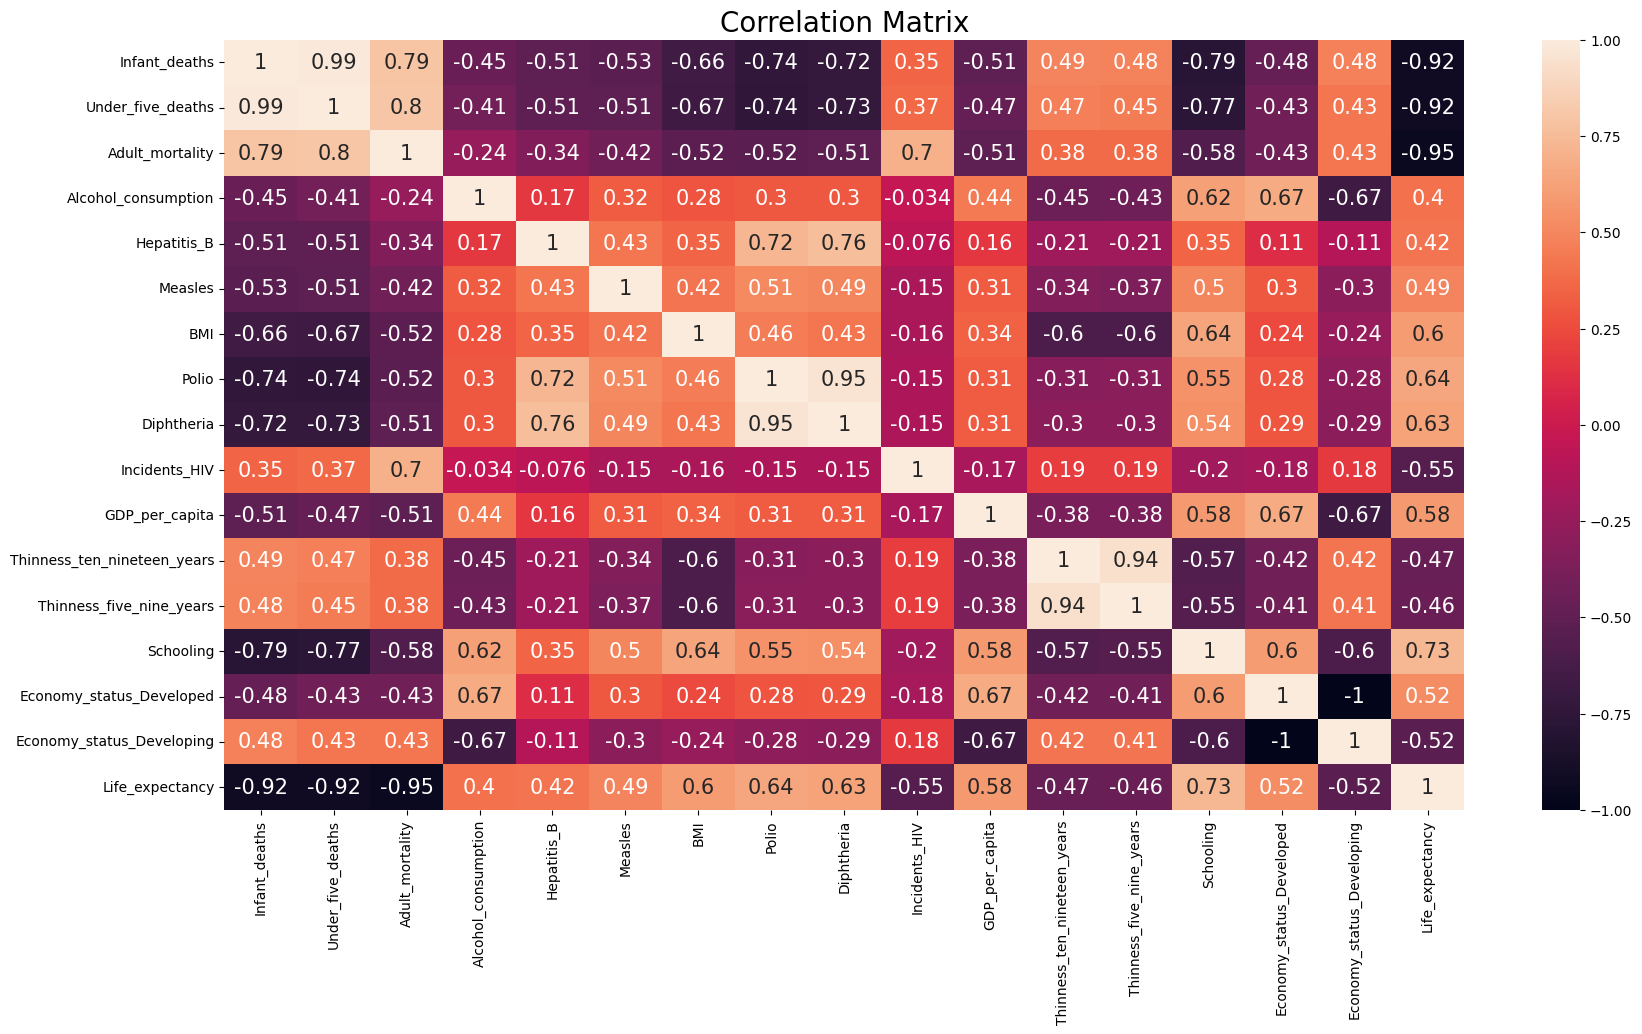

In [374]:
plt.figure(figsize=(20,10))
plt.title("Correlation Matrix",fontsize=20)
sns.heatmap(df_num.drop(['Year','Population_mln'],axis=1).corr(),annot=True,annot_kws={"size":15})
plt.show()

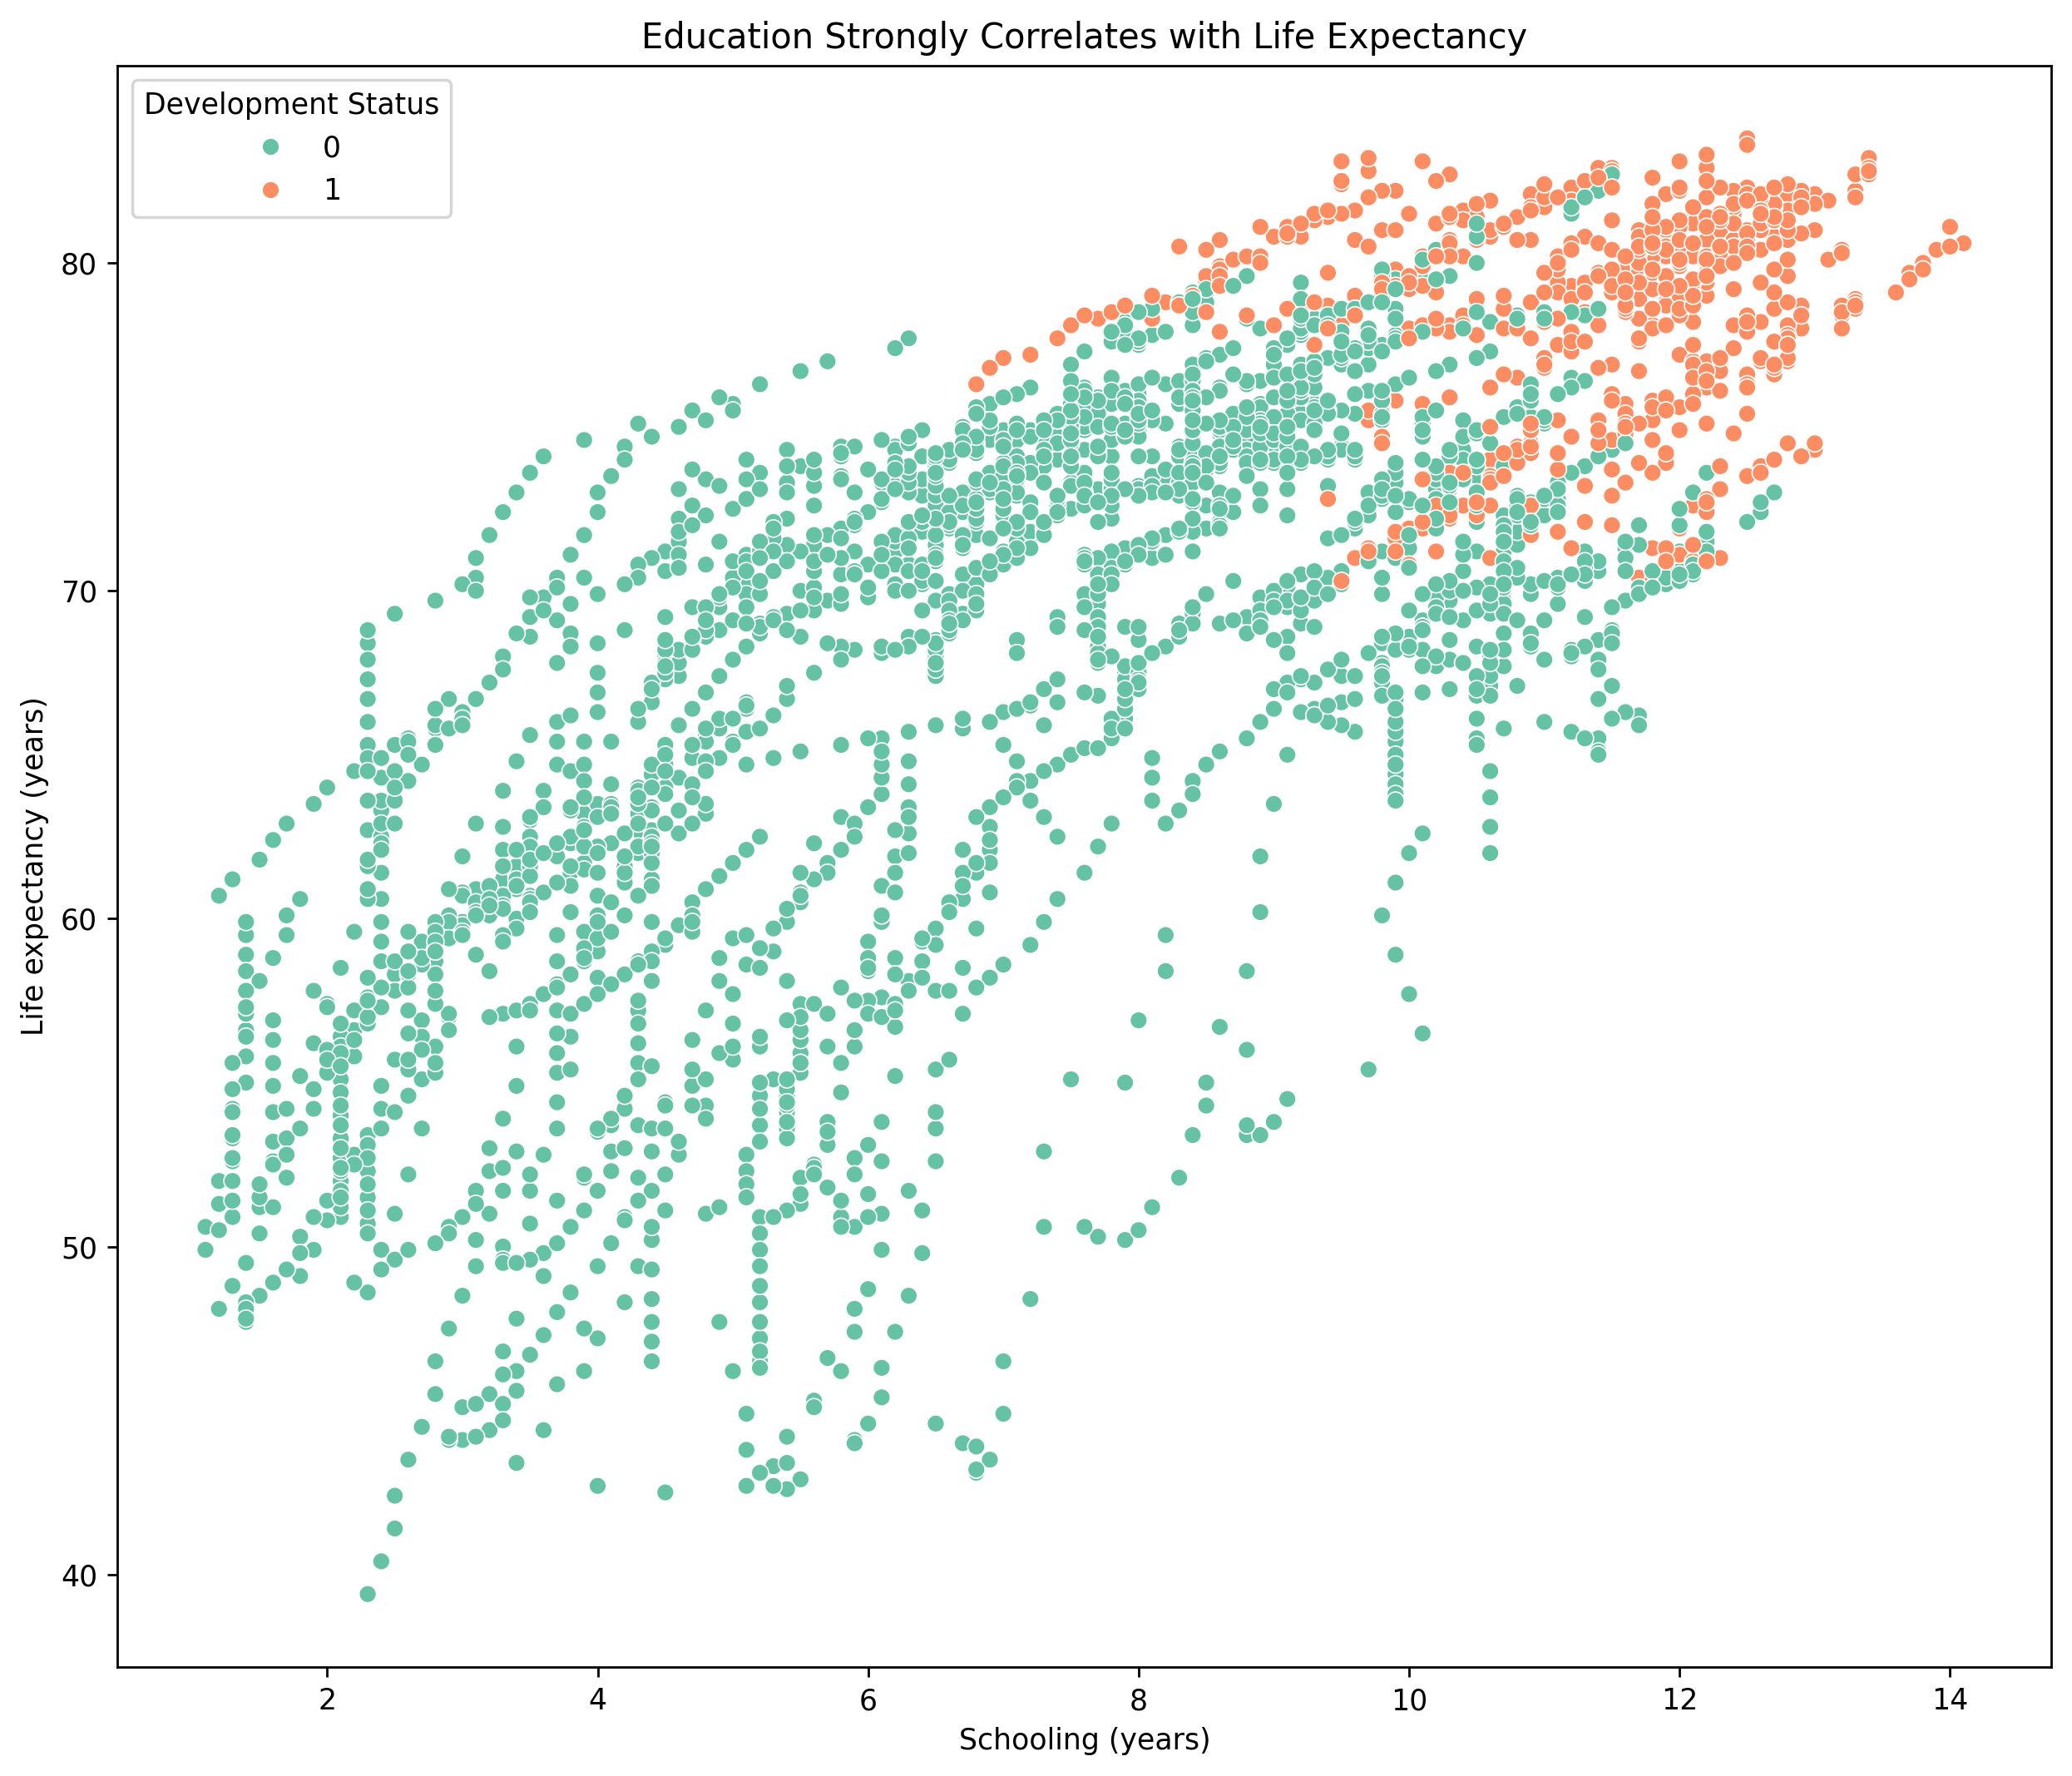

In [375]:
# SCATTERPLOT
plt.figure(figsize=(12, 10), dpi=250)
sns.scatterplot(data=df1,x='Schooling', y='Life_expectancy',hue='Economy_status_Developed',palette='Set2')
plt.title("Education Strongly Correlates with Life Expectancy")
plt.ylabel("Life expectancy (years)")
plt.xlabel("Schooling (years)")
plt.legend(title="Development Status")
plt.show()

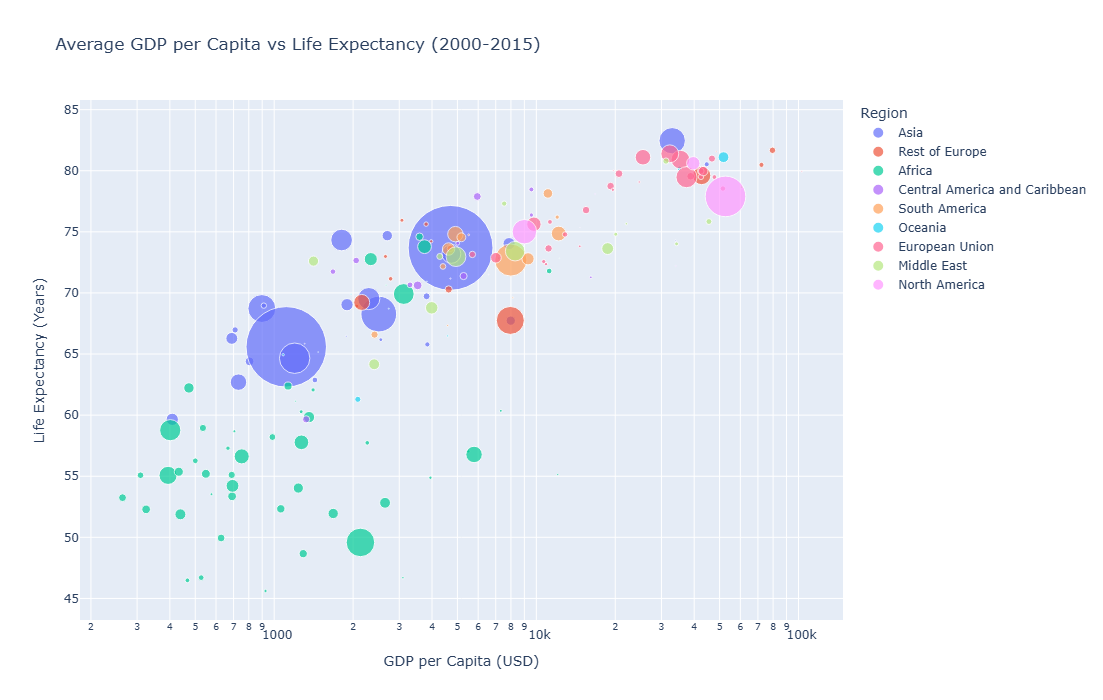

In [376]:
# GROUPING BY COUNTRY
df_agg = df1.groupby('Country').agg({
    'GDP_per_capita':'mean',
    'Life_expectancy':'mean',
    'Population_mln':'mean',
    'Region':'first'
}).reset_index()

# BUBBLE PLOT
fig = px.scatter(
    df_agg,
    x="GDP_per_capita",
    y="Life_expectancy",
    size="Population_mln",      
    color="Region",
    hover_name="Country",       
    size_max=60,
    title="Average GDP per Capita vs Life Expectancy (2000-2015)"
)

fig.update_layout(
    width=1100,   
    height=700,
    xaxis_title="GDP per Capita (USD)",
    yaxis_title="Life Expectancy (Years)",
    legend_title="Region"
)
fig.update_xaxes(type='log')
fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20000\3799600692.py:8: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



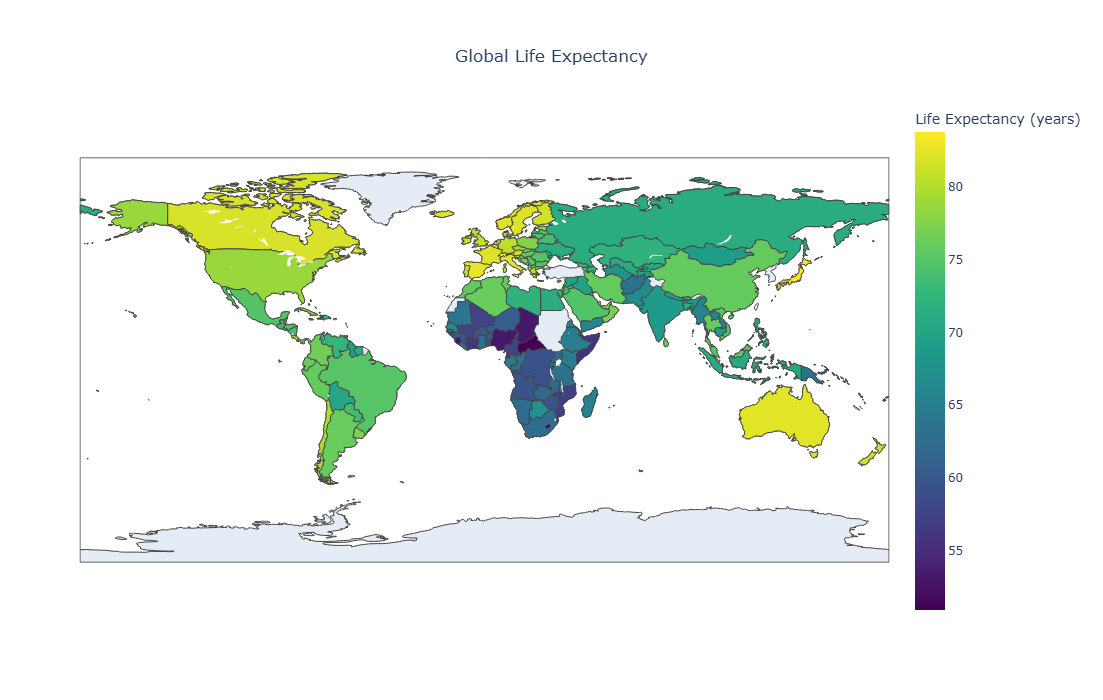

<Figure size 4000x1000 with 0 Axes>

In [377]:
# VISUALIZING GLOBAL LIFE EXPECTANCY 

# SELECTING FOR MOST RECENT YEAR
latest_year = df1['Year'].max()
df_latest = df1[df1['Year'] == latest_year]

# MAP PLOT
fig = px.choropleth(
    df_latest,
    locations="Country",           
    locationmode="country names",  
    color="Life_expectancy",
    hover_name="Country",        
    color_continuous_scale="Viridis",
    title="Global Life Expectancy",
    labels={"Life_expectancy": "Life Expectancy (years)"}  
)

# CALIBRATING SIZE
fig.update_layout(
    width=1100,   
    height=700,
    title=dict(
        text="Global Life Expectancy",
        x=0.5, 
        xanchor="center",
        yanchor="top")
)

plt.figure(figsize=(40,10))
fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20000\2026942941.py:5: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



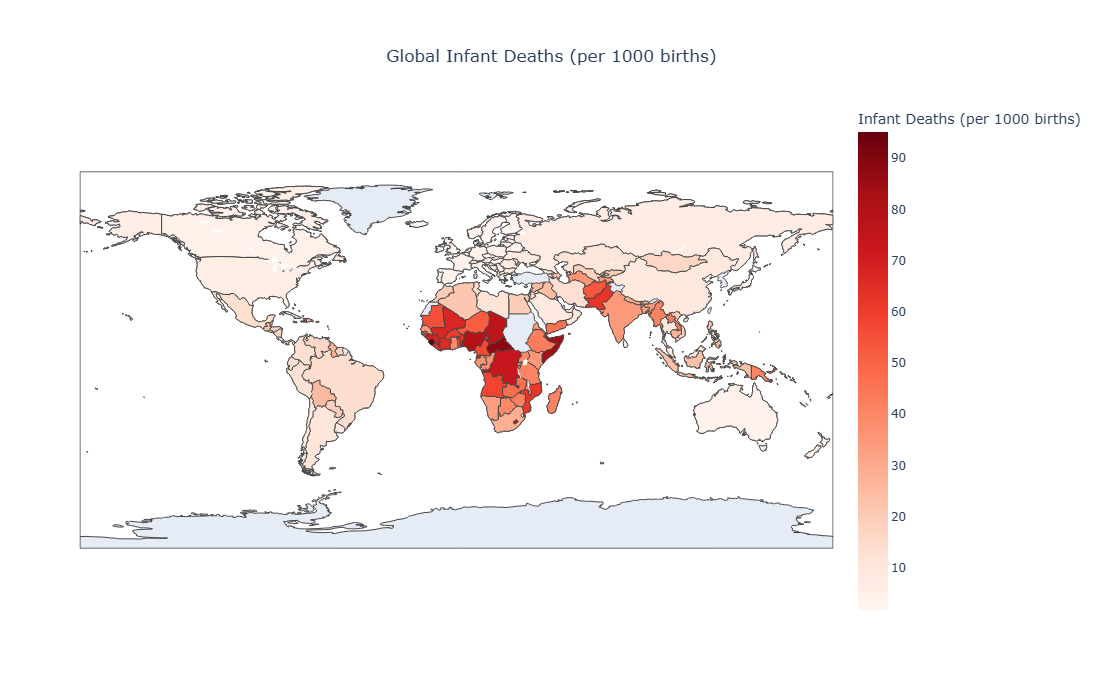

<Figure size 4000x1000 with 0 Axes>

In [378]:
latest_year = df1['Year'].max()
df_latest = df1[df1['Year'] == latest_year]

# Choropleth 
fig1 = px.choropleth(
    df_latest,
    locations="Country",
    locationmode="country names",
    color="Infant_deaths",
    hover_name="Country",
    color_continuous_scale="Reds",
    title=f"Infant Mortality by Country ({latest_year})",
    labels={"Infant_deaths": "Infant Deaths (per 1000 births)"})

fig1.update_layout(
    width=1100,   
    height=700,
    title=dict(
        text="Global Infant Deaths (per 1000 births)",
        x=0.5,  # center (0 = left, 0.5 = center, 1 = right)
        xanchor="center",
        yanchor="top"))

plt.figure(figsize=(40,10))
fig1.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20000\2775098103.py:5: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



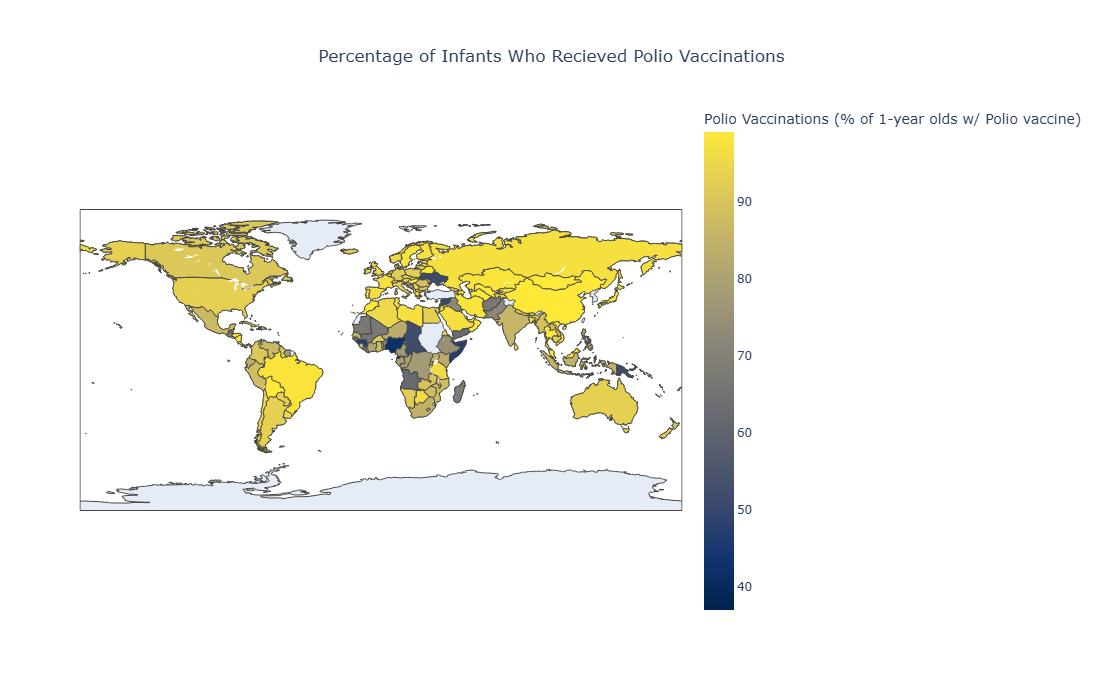

<Figure size 4000x1000 with 0 Axes>

In [379]:
latest_year = df1['Year'].max()
df_latest = df1[df1['Year'] == latest_year]

# Choropleth for Polio Vaccination Coverage
fig = px.choropleth(
    df_latest,
    locations="Country",
    locationmode="country names",
    color="Polio",
    hover_name="Country",
    color_continuous_scale="Cividis",
    title=f"Polio Vaccination Coverage by Country ({latest_year})",
    labels={"Polio": "Polio Vaccinations (% of 1-year olds w/ Polio vaccine)"}
)

fig.update_layout(
    width=1100,   
    height=700,
    title=dict(
        text="Percentage of Infants Who Recieved Polio Vaccinations ",
        x=0.5,  # center (0 = left, 0.5 = center, 1 = right)
        xanchor="center",
        yanchor="top")
)
plt.figure(figsize=(40,10))
fig.show()

<h1 style="color:#1f77b4; text-align:center;"><b>KEY TAKEAWAYS</b></h1>

<hr style="border:2px solid #ff7f0e">

<h2 style="color:#ff7f0e;"><b>AFRICA'S LIFE EXPECTANCY BELOW GLOBAL AVERAGE</b></h2>

<hr style="border:1px dashed #1f77b4">

<h3 style="color:#2ca02c;"><u>DRIVING FACTORS</u></h3>

<h4 style="color:#9467bd;"><b>GDP PER CAPITA AND YEARS SPENT IN SCHOOL</b></h4>
<p style="margin-left:20px;">Higher income and education levels are strongly correlated with longer life expectancy.</p>

<h4 style="color:#d62728;"><b>VACCINATING IMPROVES LIFE EXPECTANCY</b></h4>
<p style="margin-left:20px;">Immunization coverage, especially for diseases like polio, significantly reduces mortality rates.</p>
